# ST1511_AIML_CA1_Part A
### Swam Htet Aung
### DAAA/FT/1B/03
### p2435567


### Background Research & Data Exploration

This prediction task is a classification task that aims to identify whether a machine is "working properly" or is "faulty" based on various input features in the dataset. The dataset, factory_data.csv, provides several attributes related to each machine, which will be used as input features to predict the machine's status. The goal is to develop a predictive model that can help identify faulty machines early, which could support maintenance and quality control efforts.<br><br>
Output Variable (Machine Status): <br> The target variable for this task is Machine Status, which indicates whether a machine is operating normally or abnormally.
<br>
0: Normal (the machine is functioning properly)<br>
1: Abnormal (the machine is faulty)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")


#### Load Data

In [90]:
# Load the factory_data.csv dataset

df = pd.read_csv('CA1-Dataset/factory_data.csv')

#### Exploration of Loaded Data

In [32]:
# first 5 rows of data 
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [33]:
# last 5 rows of data
df.tail()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
19995,19996,T87335,M,25.75,35.35,NaN,29.5,14,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19997,19998,T83921,M,25.95,NaN,NaN,33.4,22,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0
19999,20000,Z10048,M,25.95,35.65,1500.0,40.2,30,0


In [34]:
# show basic information of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [35]:
# show numerical summaries
df.drop(['Unique ID', 'Machine Status'], axis=1).describe()

,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
count,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000
mean,26.904930,36.904291,1538.795397,39.986910,107.951000
std,2.000834,1.483647,178.674963,9.968684,63.652555
min,22.150000,32.550000,1168.000000,3.800000,0.000000
25%,25.250000,35.750000,1423.000000,33.200000,53.000000
50%,26.950000,36.950000,1503.000000,40.100000,108.000000
75%,28.450000,37.950000,1613.000000,46.800000,162.000000
max,31.450000,40.750000,2886.000000,76.600000,253.000000


In [36]:
# show counts of each value in target variable
print(df['Machine Status'].value_counts())

Machine Status
0    19322
1      678
Name: count, dtype: int64


In [37]:
# Check missing values
df.isnull().sum().sort_values()

Unique ID                  0
Product ID                 0
Ambient T (C)              0
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
Process T (C)            400
Quality                  991
Rotation Speed (rpm)    1188
dtype: int64

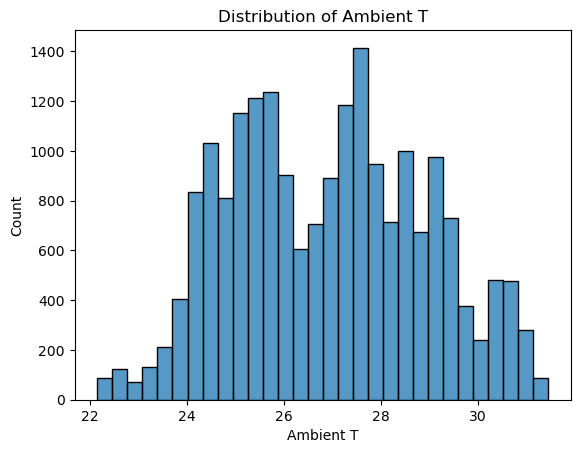

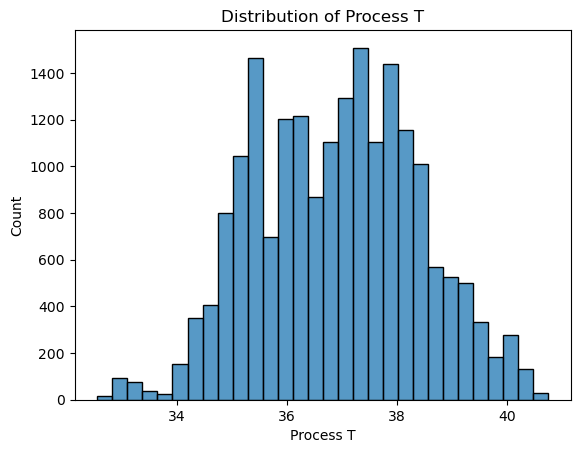

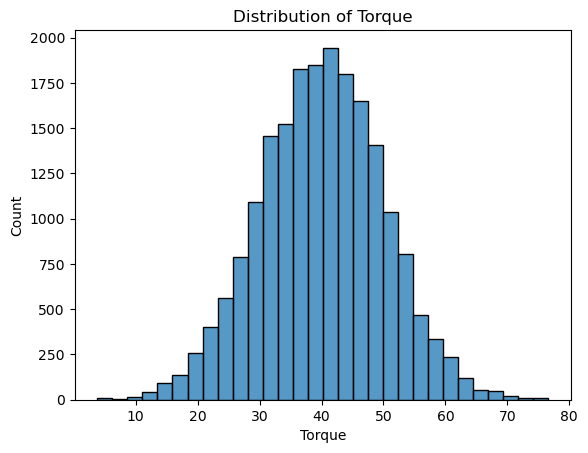

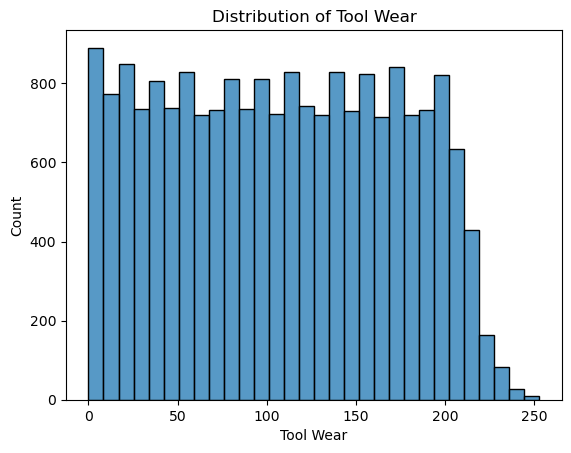

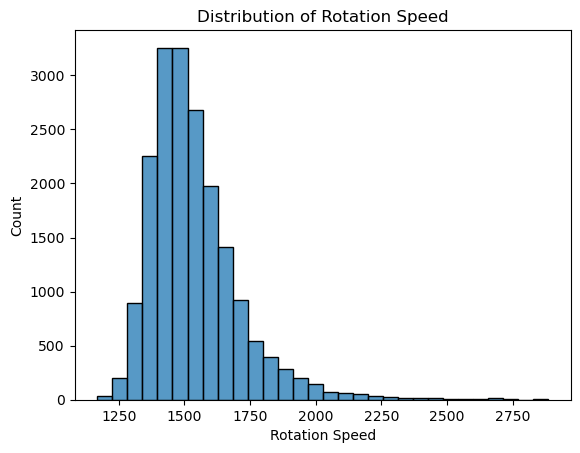

In [38]:
# Histograms to visualize the distribution of each feature

sns.histplot(df['Ambient T (C)'], bins=30)
plt.title('Distribution of Ambient T')
plt.xlabel('Ambient T')
plt.show()

sns.histplot(df['Process T (C)'], bins=30)
plt.title('Distribution of Process T')
plt.xlabel('Process T')
plt.show()

sns.histplot(df['Torque (Nm)'], bins=30)
plt.title('Distribution of Torque')
plt.xlabel('Torque')
plt.show()

sns.histplot(df['Tool Wear (min)'], bins=30)
plt.title('Distribution of Tool Wear')
plt.xlabel('Tool Wear')
plt.show()

sns.histplot(df['Rotation Speed (rpm)'], bins=30)
plt.title('Distribution of Rotation Speed')
plt.xlabel('Rotation Speed')
plt.show()

# The distribution of Torque appears to be normal, suggesting that it could be an important feature for training the model. 
# On the other hand, Rotation Speed shows a positive skew, indicating that using the median would be the most appropriate method to handle any missing values. 
# For the remaining features, no clear or obvious distribution patterns are observed, though process T and ambient T exhibit distributions that are somewhat similar to a bell-shaped curve.

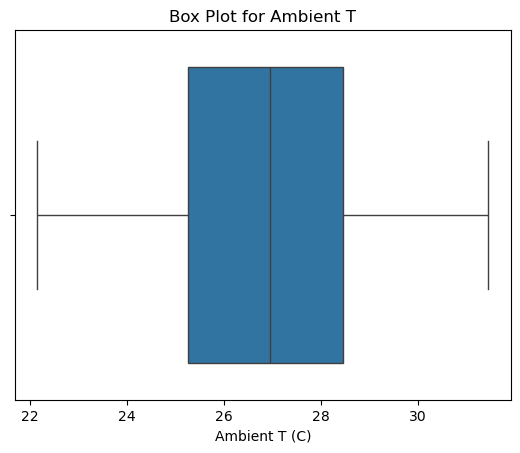

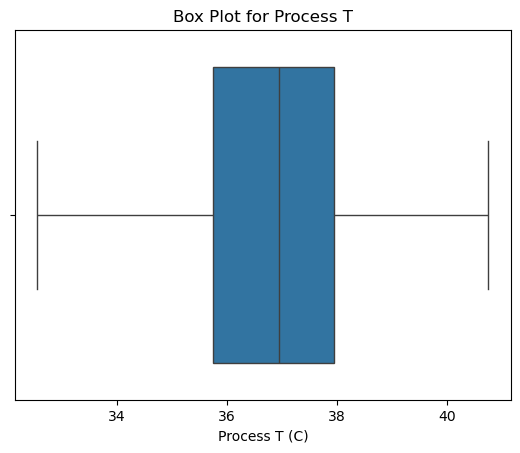

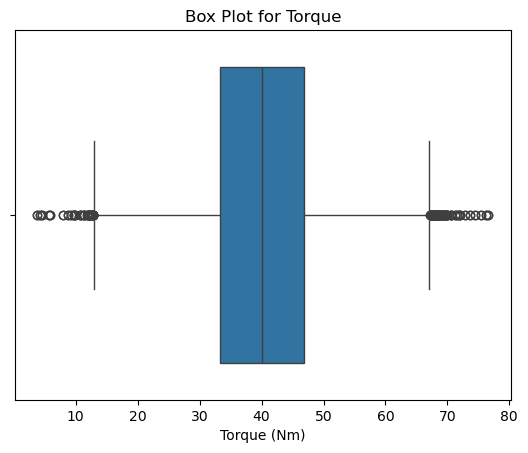

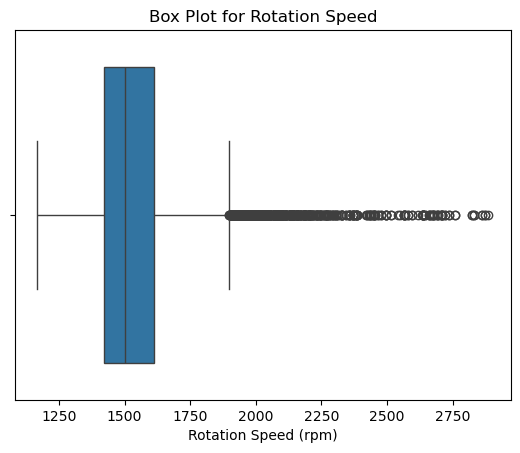

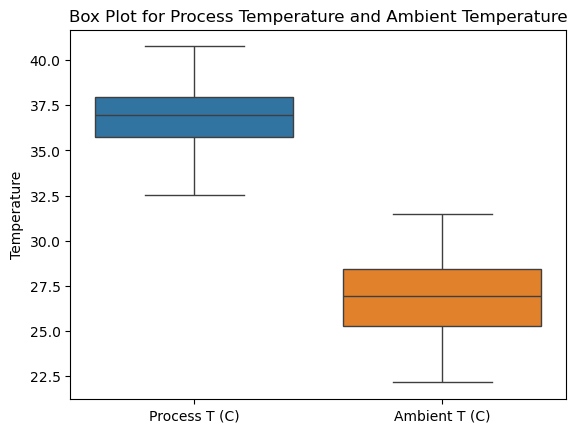

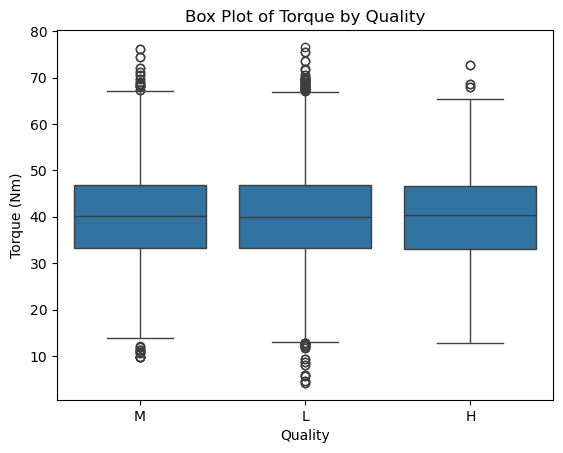

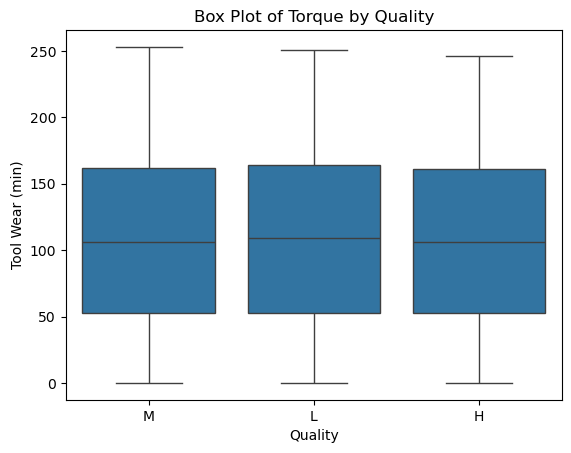

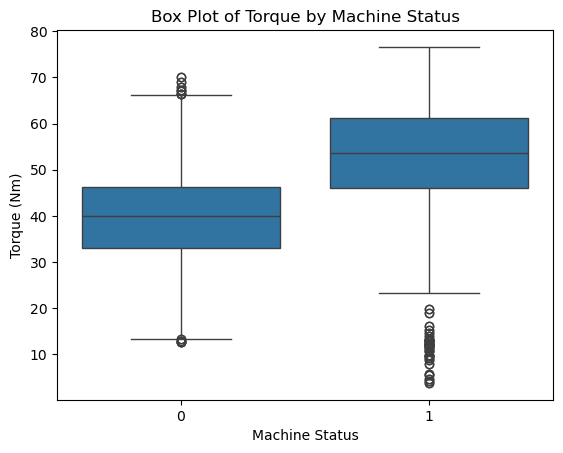

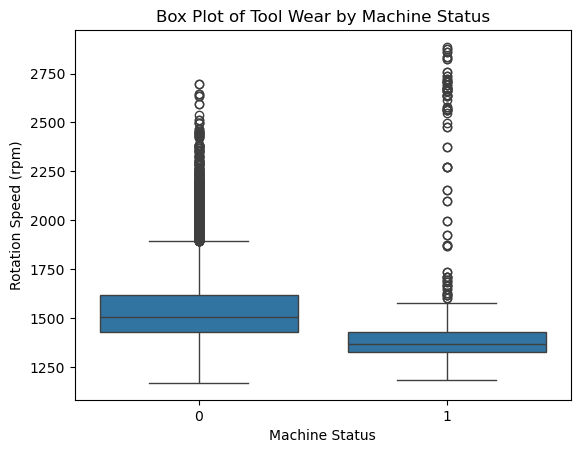

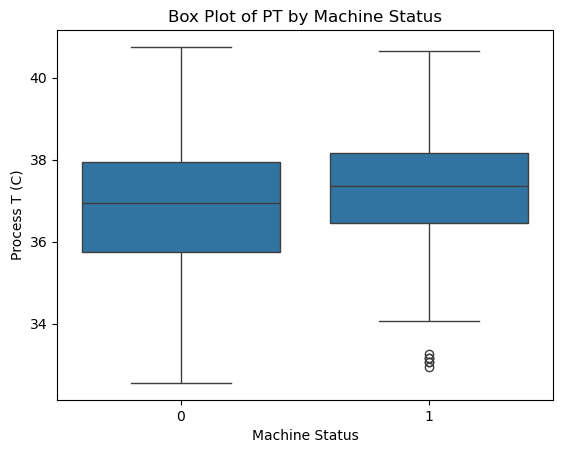

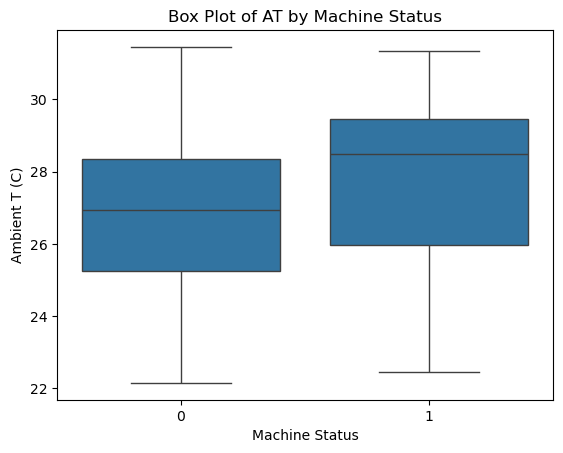

In [39]:
# Box plot used to visualize the median, interquartile range, and potential outliers in each feature

sns.boxplot(x=df['Ambient T (C)'])
plt.title('Box Plot for Ambient T')
plt.show()

sns.boxplot(x=df['Process T (C)'])
plt.title('Box Plot for Process T')
plt.show()

sns.boxplot(x=df['Torque (Nm)'])
plt.title('Box Plot for Torque')
plt.show()

sns.boxplot(x=df['Rotation Speed (rpm)'])
plt.title('Box Plot for Rotation Speed')
plt.show()

sns.boxplot(data=df[['Process T (C)', 'Ambient T (C)']])
plt.title('Box Plot for Process Temperature and Ambient Temperature')
plt.ylabel('Temperature')
plt.show()

sns.boxplot(x='Quality', y='Torque (Nm)', data=df)
plt.title('Box Plot of Torque by Quality')
plt.show()

sns.boxplot(x='Quality', y='Tool Wear (min)', data=df)
plt.title('Box Plot of Torque by Quality')
plt.show()

sns.boxplot(x='Machine Status', y='Torque (Nm)', data=df)
plt.title('Box Plot of Torque by Machine Status')
plt.show()

sns.boxplot(x='Machine Status', y='Rotation Speed (rpm)', data=df)
plt.title('Box Plot of Tool Wear by Machine Status')
plt.show()

sns.boxplot(x='Machine Status', y='Process T (C)', data=df)
plt.title('Box Plot of PT by Machine Status')
plt.show()

sns.boxplot(x='Machine Status', y='Ambient T (C)', data=df)
plt.title('Box Plot of AT by Machine Status')
plt.show()

# The distribution of Ambient T, Process T, Torque, and Rotation Speed aligns with the patterns observed in their histograms. 
# Process T is consistently higher than Ambient T. 
# Torque does not show a noticeable relationship with Quality but tends to be higher in faulty machines. 
# The median of Rotation Speed is slightly lower in faulty machines while both Process T and Ambient T appear to be higher.


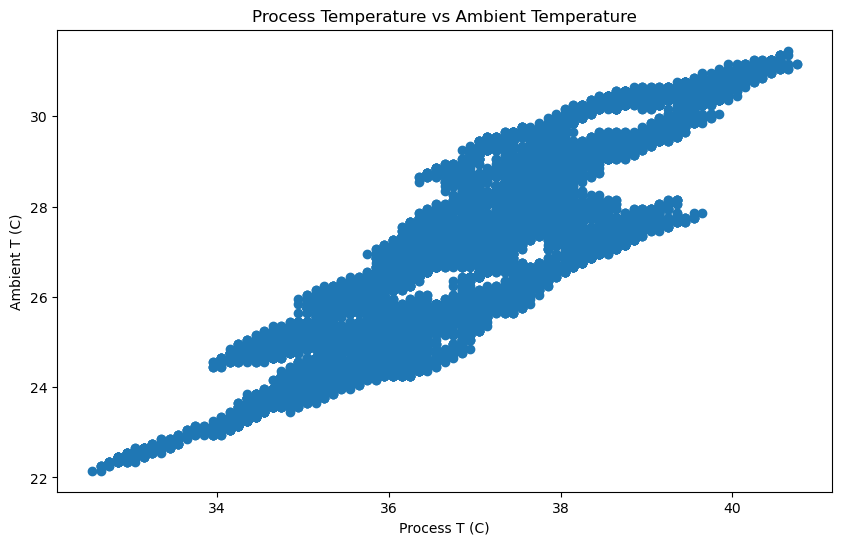

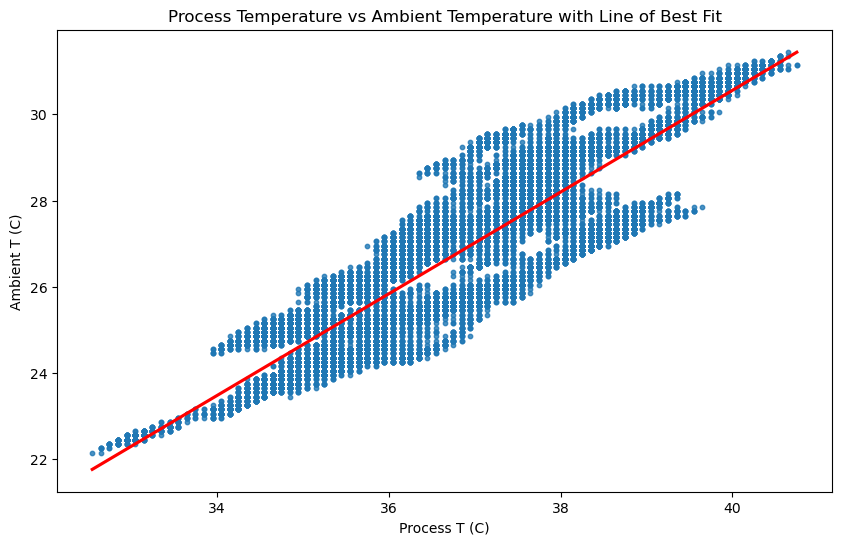

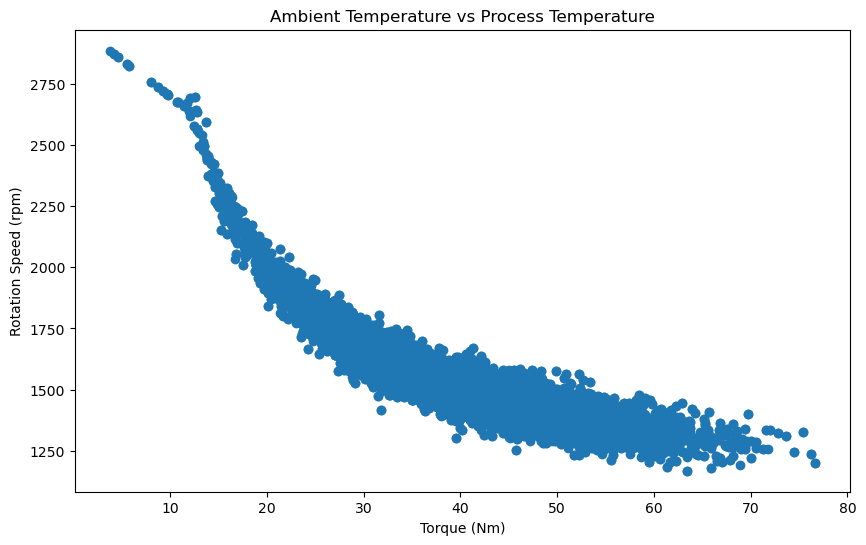

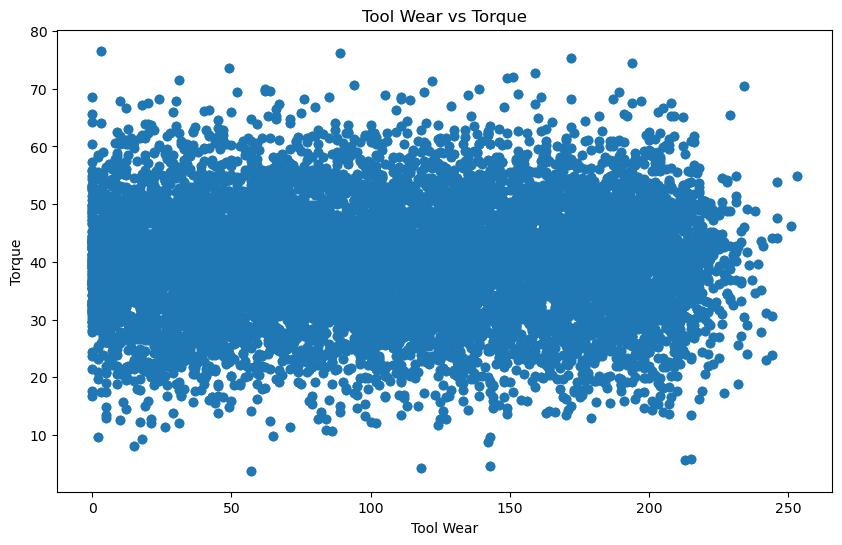

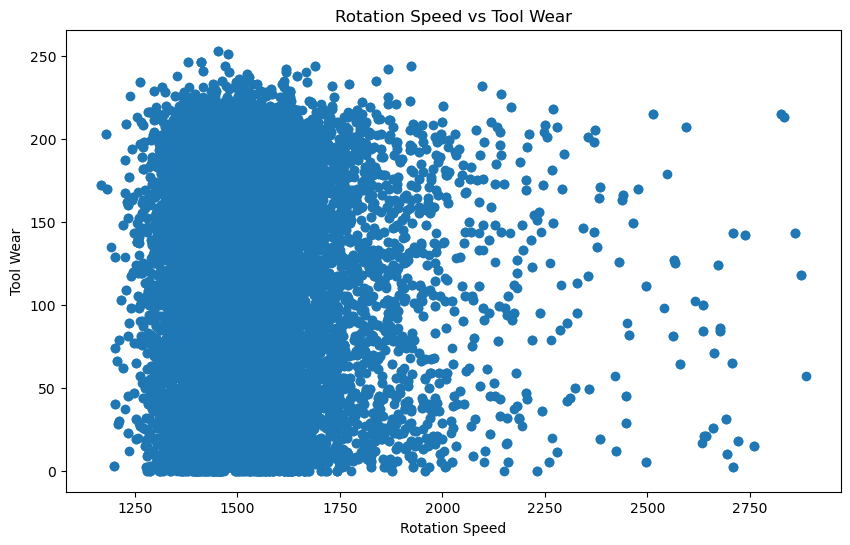

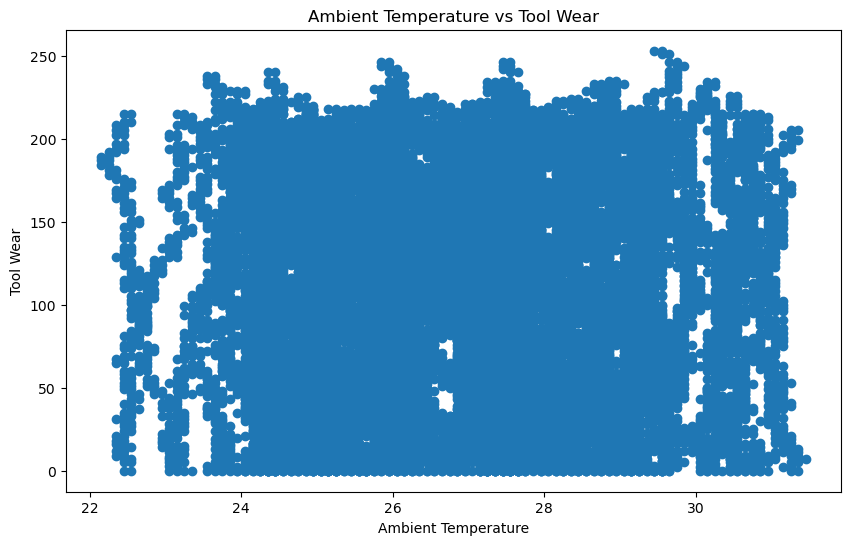

In [40]:
# Scatter plot to observe the relationship between two features

plt.figure(figsize=(10, 6))
plt.scatter(df['Process T (C)'], df['Ambient T (C)'])
plt.xlabel('Process T (C)')
plt.ylabel('Ambient T (C)')
plt.title('Process Temperature vs Ambient Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Process T (C)', y='Ambient T (C)', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Process T (C)')
plt.ylabel('Ambient T (C)')
plt.title('Process Temperature vs Ambient Temperature with Line of Best Fit')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Torque (Nm)'], df['Rotation Speed (rpm)'])
plt.xlabel('Torque (Nm)')
plt.ylabel('Rotation Speed (rpm)')
plt.title('Ambient Temperature vs Process Temperature')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Tool Wear (min)'], df['Torque (Nm)'])
plt.xlabel('Tool Wear')
plt.ylabel('Torque')
plt.title('Tool Wear vs Torque')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Rotation Speed (rpm)'], df['Tool Wear (min)'])
plt.xlabel('Rotation Speed')
plt.ylabel('Tool Wear')
plt.title('Rotation Speed vs Tool Wear')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Ambient T (C)'], df['Tool Wear (min)'])
plt.xlabel('Ambient Temperature')
plt.ylabel('Tool Wear')
plt.title('Ambient Temperature vs Tool Wear')
plt.show()

# Process T and Ambient T exhibit a positive linear relationship, while Torque and Rotation Speed display a negative non-linear relationship.


In [41]:
# Categorical feature to explore

categorical_features = ['Quality', 'Machine Status']

# Unique values and frequencies for each feature
for feature in categorical_features:
    print(f"{feature} - Unique Values:\n", df[feature].unique())
    print(f"{feature} - Value Counts:\n", df[feature].value_counts())
    print("\n")

# There are a lot of low-quality machines, yet most of the machines seem to be functioning properly. 
# This suggests that there might not be a relationship between Quality and Machine Status.


Quality - Unique Values:
 ['M' 'L' nan 'H']
Quality - Value Counts:
 Quality
L    11390
M     5696
H     1923
Name: count, dtype: int64


Machine Status - Unique Values:
 [0 1]
Machine Status - Value Counts:
 Machine Status
0    19322
1      678
Name: count, dtype: int64




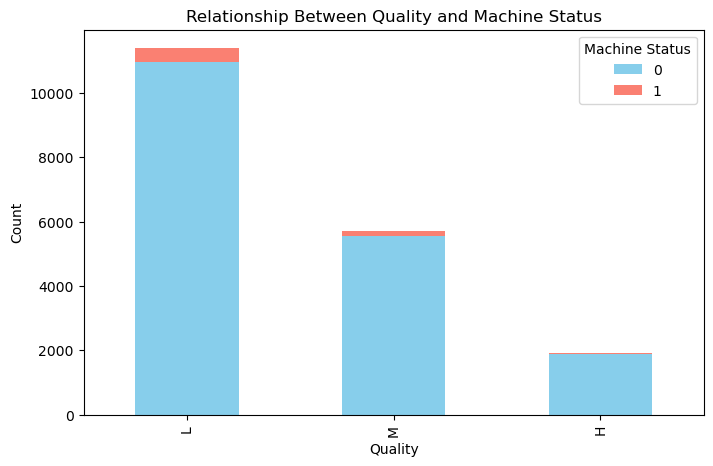

In [42]:
# Bar graph to visualise the relationship between 'Quality' and 'Machine Status'

# Relationship between 'Quality' and 'Machine Status'
cross_tab = pd.crosstab(df['Quality'], df['Machine Status'])

# Sort the crosstab DataFrame by total count in descending order
cross_tab_sorted = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]

# Visualize with a bar plot
cross_tab_sorted.plot(kind='bar', stacked=True, figsize=(8, 5), color=["skyblue", "salmon"])
plt.title("Relationship Between Quality and Machine Status")
plt.ylabel("Count")
plt.show()


# Based on this bar graph, we can suggest that low-quality machines are tend to be more faulty, but since the number of normal machines also found to be highest in low-quality  .

### Feature Engineering 

In [91]:
# Handling missing data

# Impute missing values for Process T and Rotation Speed using KNN
knn_imputer = KNNImputer(n_neighbors=5)
df[['Ambient T (C)', 'Process T (C)']] = knn_imputer.fit_transform(df[['Ambient T (C)', 'Process T (C)']])

# Impute missing values for Torque and Rotation Speed using KNN
df[['Torque (Nm)', 'Rotation Speed (rpm)']] = knn_imputer.fit_transform(df[['Torque (Nm)', 'Rotation Speed (rpm)']])

# Quality is categorical, so I use the mode
df['Quality'].fillna(df['Quality'].mode()[0], inplace=True)

# Check missing values
df.isnull().sum().sort_values()


Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [92]:
# Feature encoding

# One-hot encoding for 'Quality' column
df = pd.get_dummies(df, columns=['Quality'], drop_first=True)


In [93]:
# Dropping columns that are least useful 
df = df.drop(['Unique ID', 'Product ID'], axis=1)

### Modelling and Evaluation 

In [71]:
# Assigning features (X) and target variable (y) to train the model

X = df.drop(['Machine Status'], axis=1) 
y = df['Machine Status']


Based on the scenario, recall is the most appropriate classification metric to compare the models' performance. This is because recall focuses on identifying faulty machines (the positive class), which is critical for quality control in the manufacturing process. A high recall ensures that most of the faulty machines are correctly identified, minimizing the risk of undetected failures that could disrupt production. So, I will use recall to compare my models' performance throughout. 

Model Decision Tree prediction accuracy is 99.0%, f1-score is 99.0%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3864
           1       0.87      0.82      0.85       136

    accuracy                           0.99      4000
   macro avg       0.93      0.91      0.92      4000
weighted avg       0.99      0.99      0.99      4000

Model Random Forest prediction accuracy is 99.3%, f1-score is 99.3%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3864
           1       1.00      0.80      0.89       136

    accuracy                           0.99      4000
   macro avg       1.00      0.90      0.94      4000
weighted avg       0.99      0.99      0.99      4000

Model Logistic Regression prediction accuracy is 97.2%, f1-score is 96.4%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3864
           1       0.86    

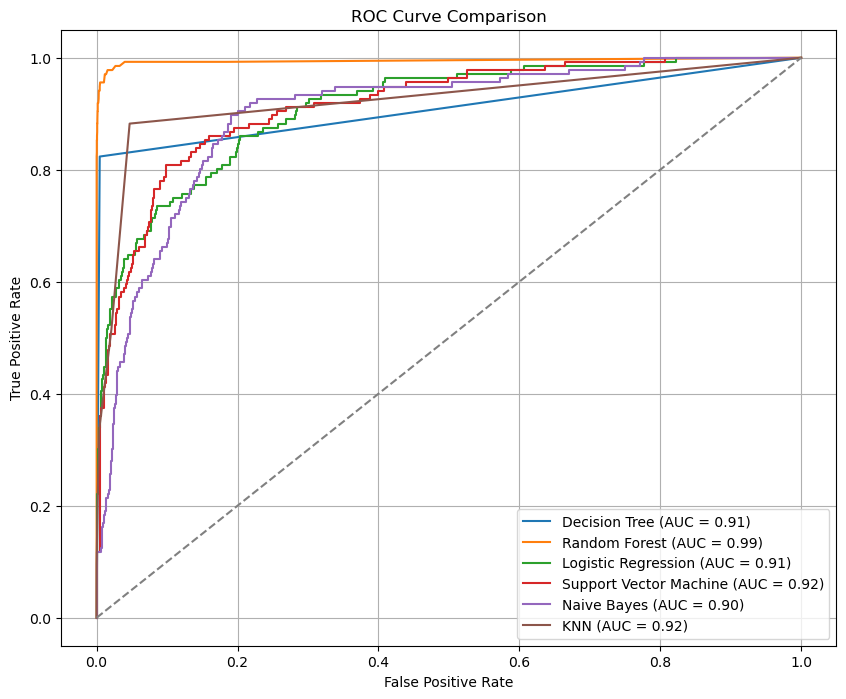

In [94]:
# Training various models

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Models to use
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Support Vector Machine': SVC(),  
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
}

# Initialize a plot for ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'Model {name} prediction accuracy is {accuracy*100:.1f}%, f1-score is {f1*100:.1f}%')
    print(classification_report(y_test, y_pred))
    
    # Compute probabilities for ROC and AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        print(f"Skipping ROC/AUC for {name} (no probability method available)")
        continue  # Skip models that don't support ROC/AUC
    
    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line (dummy baseline)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# It can be concluded that Decision Tree and Random Forest perform the best based on recall. 
# However, since the recall value for class '1' is only 0.82 and 0.79 only, I will work on further improving the model’s performance.

### Model Improvement

#### Feature Selection

Based on above ROC curves above, I will choose two best models - Decision Tree and Random Forest to do feature selection.

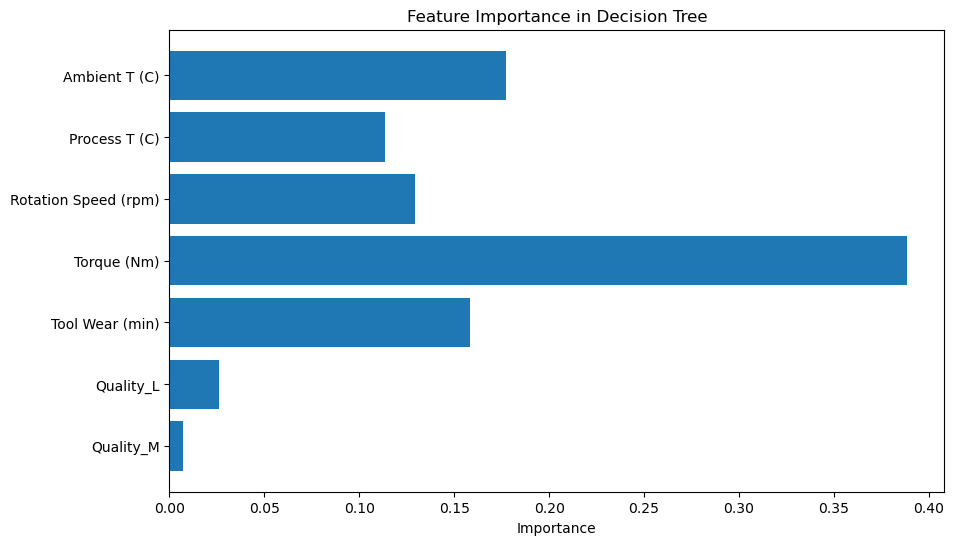

In [95]:
# Decision Tree's feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Get the feature importances from the model
importances = dt_model.feature_importances_

# Get the feature names
features = X.columns.tolist()

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

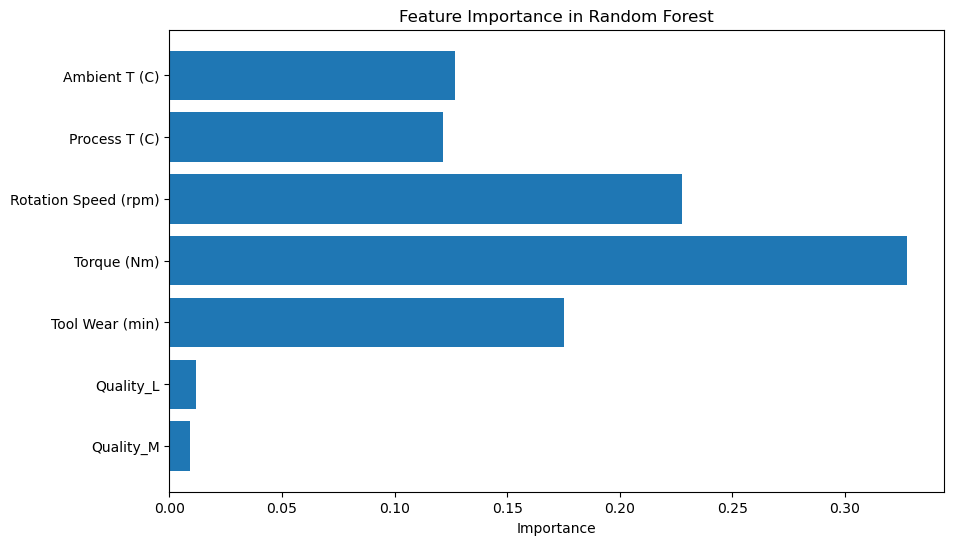

In [96]:
# Random forest's feature importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = X.columns.tolist()
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  
plt.show()


Based on the bar chart above, it appears that 'Torque' is the most important feature, as expected. On the other hand, 'Quality_L' and 'Quality_M' are the least influential features in the dataset.

#### Hyperparameter Tuning

In [78]:
# Define the model
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],          
    'min_samples_split': [2, 5, 10, 20],        
    'min_samples_leaf': [1, 2, 4, 10],          
    'max_features': [None, 'sqrt', 'log2']      
}

# Use GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print best parameters and best model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [77]:

model = RandomForestClassifier()


param_grid = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [20, 30, 40, 50],         
    'min_samples_split': [2, 5, 10, 20]     
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 300}


### Finding Best Model

#### Testing on best models with best parameters

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3863
           1       0.84      0.90      0.87       137

    accuracy                           0.99      4000
   macro avg       0.92      0.95      0.93      4000
weighted avg       0.99      0.99      0.99      4000

Confusion Matrix for Decision Tree:
[[3840   23]
 [  14  123]]


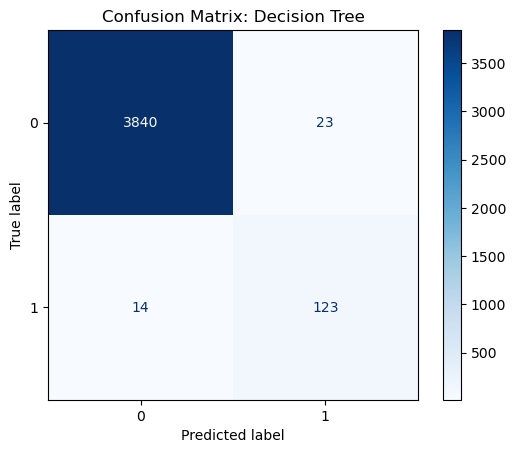

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3863
           1       0.97      0.80      0.88       137

    accuracy                           0.99      4000
   macro avg       0.98      0.90      0.94      4000
weighted avg       0.99      0.99      0.99      4000

Confusion Matrix for Random Forest:
[[3860    3]
 [  27  110]]


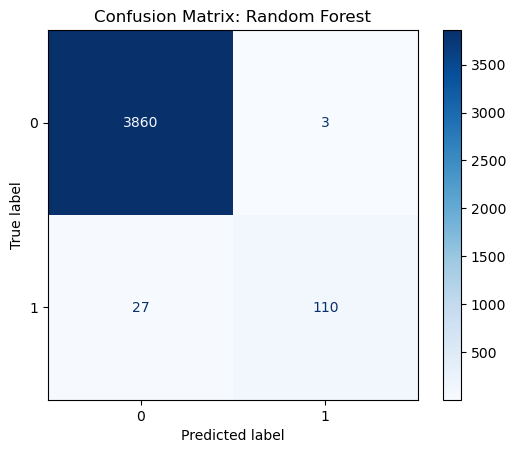

Classification Report for Dummy model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3863
           1       0.00      0.00      0.00       137

    accuracy                           0.97      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.93      0.97      0.95      4000

Confusion Matrix for Dummy model:
[[3863    0]
 [ 137    0]]


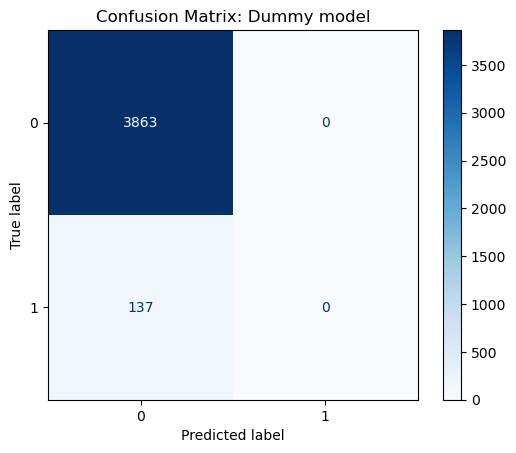

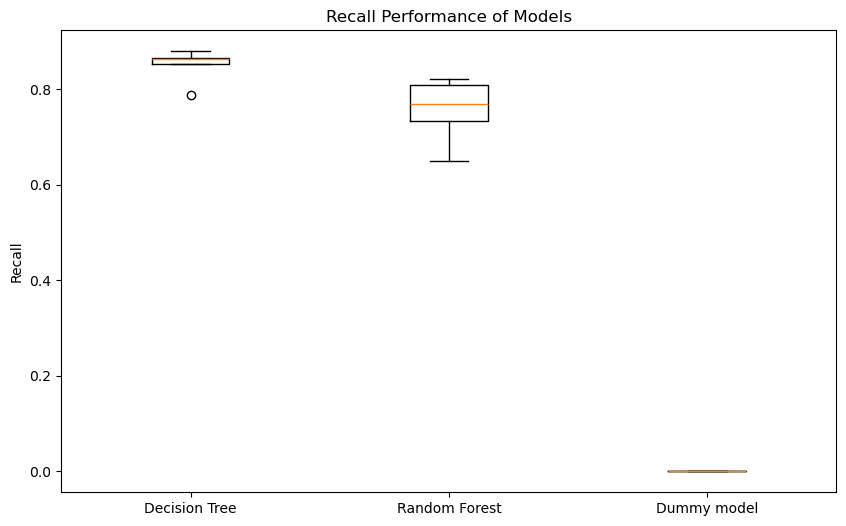

In [97]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=30, max_features = None, min_samples_leaf= 1, min_samples_split= 2),
    'Random Forest': RandomForestClassifier(max_depth= 40, min_samples_split= 2, n_estimators = 300),
    'Dummy model' : DummyClassifier()
}

# Perform cross-validation and visualize results
results = []
for name, model in models.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='recall')
    results.append(cv_results)
    
    # Train the model on the entire training set
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    pred = model.predict(X_test_scaled)
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, pred))
    
    # Confusion Matrix
    CMtest = confusion_matrix(y_test, pred)
    print(f"Confusion Matrix for {name}:")
    print(CMtest)
    
    # Display Confusion Matrix
    displayTest = ConfusionMatrixDisplay(CMtest, display_labels=model.classes_)
    displayTest.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=models.keys())
plt.title("Recall Performance of Models")
plt.ylabel("Recall")
plt.show()
